# Train model to predict digits from image library

In [1]:
    # Initial packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Load and inspect data

In [2]:
    # Load the digits dataset
digits = load_digits()

In [3]:
    # Print basic stats
unique, counts = np.unique(digits.target, return_counts=True)
digit_dist = dict(zip(unique, counts))
print("Digit distribution in dataset:", digit_dist)

Digit distribution in dataset: {np.int64(0): np.int64(178), np.int64(1): np.int64(182), np.int64(2): np.int64(177), np.int64(3): np.int64(183), np.int64(4): np.int64(181), np.int64(5): np.int64(182), np.int64(6): np.int64(181), np.int64(7): np.int64(179), np.int64(8): np.int64(174), np.int64(9): np.int64(180)}


In [4]:
    # Confirm shape
print(f"Images shape: {digits.images.shape}")
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

Images shape: (1797, 8, 8)
Data shape: (1797, 64)
Target shape: (1797,)


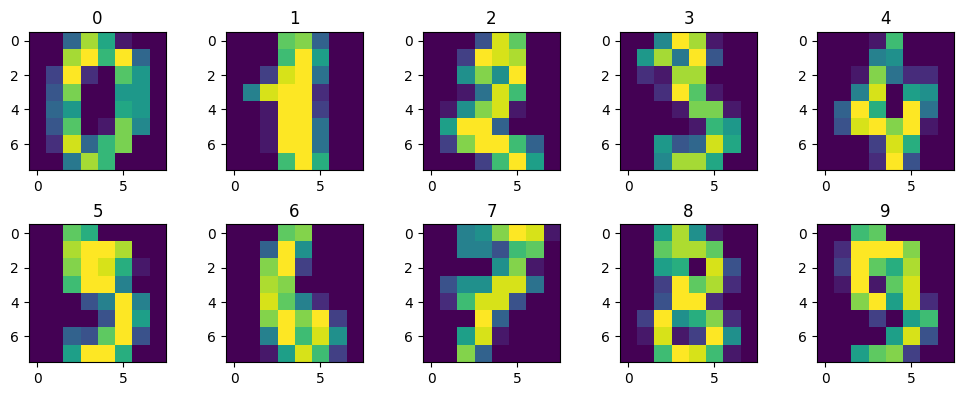

In [5]:
    # Show the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
   ax.imshow(digits.images[i])
   ax.set_title(str(digits.target[i]), fontsize=12)
plt.tight_layout()
plt.show()

# Split into testing and training

In [6]:
    # Set up data into images (X) and labels (y)
X = digits.data  # Flattened image [8x8] data (1797, 64)
y = digits.target  # Digit labels (0–9)

In [7]:
    # Split into training/test sets (80% training/20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=675, stratify=y)

# Print shapes to confirm
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1437, 64)
Testing set shape: (360, 64)


# Select and build models

In [8]:
    # Initialize the three classification models
knn_model = KNeighborsClassifier()
svc_model = SVC(random_state=675)
gnb_model = GaussianNB()

# Training

# Model 1
>K-Nearest Neighbors

In [9]:
    # Train model (default is n_neighbors=5)
knn_model.fit(X_train, y_train)

    # Predict
knn_preds = knn_model.predict(X_test)

    # Evaluate
print("---- K-Nearest Neighbors ----")
for i in range(10):
   print(f"Sample {i}: Label = {y_test[i]}, Predicted = {knn_preds[i]}")
print("\nAccuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

---- K-Nearest Neighbors ----
Sample 0: Label = 2, Predicted = 2
Sample 1: Label = 5, Predicted = 5
Sample 2: Label = 2, Predicted = 2
Sample 3: Label = 2, Predicted = 2
Sample 4: Label = 8, Predicted = 8
Sample 5: Label = 4, Predicted = 4
Sample 6: Label = 7, Predicted = 7
Sample 7: Label = 3, Predicted = 3
Sample 8: Label = 2, Predicted = 2
Sample 9: Label = 8, Predicted = 1

Accuracy: 0.9833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        37
           2       1.00      0.97      0.99        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00  

# Model 2
>Support Vector Classifier

In [10]:
    # Train
svc_model.fit(X_train, y_train)

    # Predict
svc_preds = svc_model.predict(X_test)

    # Evaluate
print("---- Support Vector Classifier ----")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print("Classification Report:\n", classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))

---- Support Vector Classifier ----
Accuracy: 0.9888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       0.97      0.97      0.97        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 

# Model 3
>Gaussian Naive Bayes

In [11]:
    # Train
gnb_model.fit(X_train, y_train)

    # Predict
gnb_preds = gnb_model.predict(X_test)

    # Evaluate
print("---- Gaussian Naive Bayes ----")
print("Accuracy:", accuracy_score(y_test, gnb_preds))
print("Classification Report:\n", classification_report(y_test, gnb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, gnb_preds))

---- Gaussian Naive Bayes ----
Accuracy: 0.8222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.71      0.92      0.80        37
           2       0.80      0.46      0.58        35
           3       0.93      0.68      0.78        37
           4       0.94      0.83      0.88        36
           5       0.91      0.89      0.90        36
           6       1.00      1.00      1.00        36
           7       0.77      1.00      0.87        36
           8       0.52      0.83      0.64        35
           9       0.96      0.64      0.77        36

    accuracy                           0.82       360
   macro avg       0.85      0.82      0.82       360
weighted avg       0.85      0.82      0.82       360

Confusion Matrix:
 [[35  0  0  0  0  1  0  0  0  0]
 [ 0 34  1  0  0  0  0  0  1  1]
 [ 0  6 16  0  0  0  0  0 13  0]
 [ 0  1  1 25  0  2  0  3  5  0]
 [ 0  

# Model 4
(Model 4 & 5 To compare against functions I am already familiar with)
>Tree vs Forest

In [12]:
    # Compare decision tree against random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

    # Initialize models
dt_model = DecisionTreeClassifier(random_state=675)
rf_model = RandomForestClassifier(random_state=675)

    # Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

    # Predict
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

    # Evaluate Decision Tree
print("---- Decision Tree ----")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

    # Evaluate Random Forest
print("\n---- Random Forest ----")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

---- Decision Tree ----
Accuracy: 0.8611111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.82      0.89      0.86        37
           2       0.86      0.86      0.86        35
           3       0.90      0.73      0.81        37
           4       0.74      0.81      0.77        36
           5       0.94      0.94      0.94        36
           6       0.97      0.92      0.94        36
           7       0.86      0.89      0.88        36
           8       0.81      0.83      0.82        35
           9       0.74      0.78      0.76        36

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

Confusion Matrix:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 33  1  1  2  0  0  0  0  0]
 [ 0  1 30  0  0  0  1  1  0  2]
 [ 0  0  0 27  1  0  0  1  5  3]
 [ 0  3  0  0

# Model 5
>Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

    # Initialize model
lr_model = LogisticRegression(max_iter=1000, random_state=675)

    # Train
lr_model.fit(X_train, y_train)

    # Predict
lr_preds = lr_model.predict(X_test)

    # Evaluate
print("---- Logistic Regression ----")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

---- Logistic Regression ----
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        37
           2       1.00      1.00      1.00        35
           3       1.00      0.95      0.97        37
           4       0.97      0.97      0.97        36
           5       0.90      0.97      0.93        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       0.94      0.94      0.94        35
           9       0.97      0.97      0.97        36

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  1  0  0  1  0]
 [ 0  1  0  0 35  0 

# Evaluate all results  
In this assignment, I trained and evaluated six classification models on the digits dataset. The models included K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Gaussian Naive Bayes (GNB), Random Forest, Decision Tree, and Logistic Regression. Among them, KNN and SVC delivered the highest accuracy at over 98.0%, followed closely by Logistic Regression (97.5%) and Random Forest (97.2%). The Decision Tree and GNB models performed lower, with accuracies in the low 80s percentile.

Both the confusion matrices and classification reports show KNN and SVC maintained consistent precision and recall across all digit classes. These results highlight the strength of margin-based and instance-based methods on image data, especially when feature distributions are complex or nonlinear.  
  
# Tuning KNN and SVC models
Tune KNN model (adjusting k first: 5(default), 3, 7, 9 then weights)

In [14]:
knn_model3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# Train
knn_model3.fit(X_train, y_train)

# Predict
knn_preds = knn_model3.predict(X_test)

# Evaluate
print("---- KNN (n=3, uniform-weighted) ----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

---- KNN (n=3, uniform-weighted) ----
Accuracy: 0.9888888888888889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        36
           8       1.00      0.97      0.99        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  0]

In [15]:
knn_model7 = KNeighborsClassifier(n_neighbors=7, weights='uniform')

# Train
knn_model7.fit(X_train, y_train)

# Predict
knn_preds = knn_model7.predict(X_test)

# Evaluate
print("---- KNN (n=7, uniform-weighted) ----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

---- KNN (n=7, uniform-weighted) ----
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        37
           2       1.00      0.97      0.99        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  1  0  0]
 [ 0  0  0 36  0  0  0  1  0  0]

In [16]:
knn_model9 = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Train
knn_model9.fit(X_train, y_train)

# Predict
knn_preds = knn_model9.predict(X_test)

# Evaluate
print("---- KNN (n=9, uniform-weighted) ----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

---- KNN (n=9, uniform-weighted) ----
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        37
           2       1.00      0.97      0.99        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       1.00      0.97      0.99        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  1  0  0]
 [ 0  0  0 36  0  0  0  1  0  0]

In [17]:
knn_modelD = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train
knn_modelD.fit(X_train, y_train)

# Predict
knn_preds = knn_modelD.predict(X_test)

# Evaluate
print("---- KNN (n=3, distance-weighted) ----")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

---- KNN (n=3, distance-weighted) ----
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        37
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        36
           8       1.00      0.97      0.99        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 34  1  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  1  0  0

Tune SVC model (adjust C: 1(default), 5, 10 and then class_weight)

In [18]:
svc_model5 = SVC(C=5, random_state=675)
    # Train
svc_model5.fit(X_train, y_train)

    # Predict
svc_preds = svc_model5.predict(X_test)

    # Evaluate
print("---- Support Vector Classifier ----")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print("Classification Report:\n", classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))

---- Support Vector Classifier ----
Accuracy: 0.9916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       0.95      1.00      0.97        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       1.00      1.00      1.00        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 

In [19]:
svc_model0 = SVC(C=10, random_state=675)
    # Train
svc_model0.fit(X_train, y_train)

    # Predict
svc_preds = svc_model0.predict(X_test)

    # Evaluate
print("---- Support Vector Classifier ----")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print("Classification Report:\n", classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))

---- Support Vector Classifier ----
Accuracy: 0.9916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       0.95      1.00      0.97        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       1.00      1.00      1.00        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 

In [20]:
svc_modelB = SVC(C=10, random_state=675, class_weight='balanced')
    # Train
svc_modelB.fit(X_train, y_train)

    # Predict
svc_preds = svc_modelB.predict(X_test)

    # Evaluate
print("---- Support Vector Classifier ----")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print("Classification Report:\n", classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))

---- Support Vector Classifier ----
Accuracy: 0.9916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       0.95      1.00      0.97        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       1.00      1.00      1.00        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 

In [28]:
    # C=5, 10, and C=2 had the same improved results
svc_model_BEST = SVC(C=1.9, random_state=675)
    # Train
svc_model_BEST.fit(X_train, y_train)

    # Predict
svc_preds = svc_model_BEST.predict(X_test)

    # Evaluate
print("---- Support Vector Classifier ----")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print("Classification Report:\n", classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))

---- Support Vector Classifier ----
Accuracy: 0.9944444444444445
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        36
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        36
           8       1.00      1.00      1.00        35
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 

By tuning KNN (n=3), I was able to increase the results up to match SVC.  
However, I was able to increase SVC results to 0.99167 by tuning C to any integer greater than 1. But I also got curious about what happened between 1 and 2 and found a range for C: 1.3-1.9 that returned an accuracy of 0.99444.  
This tuned SVC model had the best performance.

END

In [32]:
!jupyter nbconvert /content/Noble_ANA675_Wk1.ipynb --to html

[NbConvertApp] Converting notebook /content/Noble_ANA675_Wk1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 377645 bytes to /content/Noble_ANA675_Wk1.html
